In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
sample_submission = pd.read_csv("samplesubmission.csv")
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [4]:
train.head(5)

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
0,kkst1451568084,drawing for dollars,I like drawing pictures. and then i color them...,20.0,drawing-for-dollars,False,US,USD,1241333999,1241334017,1240600507,1240602723,3,1
1,kkst1474482071,Sponsor Dereck Blackburn (Lostwars) Artist in ...,"I, Dereck Blackburn will be taking upon an inc...",300.0,sponsor-dereck-blackburn-lostwars-artist-in-re...,False,US,USD,1242429000,1242432018,1240960224,1240975592,2,0
2,kkst183622197,Mr. Squiggles,So I saw darkpony's successfully funded drawin...,30.0,mr-squiggles,False,US,USD,1243027560,1243027818,1242163613,1242164398,0,0
3,kkst597742710,Help me write my second novel.,Do your part to help out starving artists and ...,500.0,help-me-write-my-second-novel,False,US,USD,1243555740,1243556121,1240963795,1240966730,18,1
4,kkst1913131122,Support casting my sculpture in bronze,"I'm nearing completion on a sculpture, current...",2000.0,support-casting-my-sculpture-in-bronze,False,US,USD,1243769880,1243770317,1241177914,1241180541,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108129 entries, 0 to 108128
Data columns (total 14 columns):
project_id               108129 non-null object
name                     108126 non-null object
desc                     108120 non-null object
goal                     108129 non-null float64
keywords                 108129 non-null object
disable_communication    108129 non-null bool
country                  108129 non-null object
currency                 108129 non-null object
deadline                 108129 non-null int64
state_changed_at         108129 non-null int64
created_at               108129 non-null int64
launched_at              108129 non-null int64
backers_count            108129 non-null int64
final_status             108129 non-null int64
dtypes: bool(1), float64(1), int64(6), object(6)
memory usage: 10.8+ MB


In [6]:
train.describe()

,goal,deadline,state_changed_at,created_at,launched_at,backers_count,final_status
count,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,1.081290e+05,108129.000000,108129.000000
mean,3.672623e+04,1.380248e+09,1.380153e+09,1.374037e+09,1.377299e+09,123.516661,0.319627
std,9.719027e+05,4.270222e+07,4.266402e+07,4.272310e+07,4.294421e+07,1176.745162,0.466334
min,1.000000e-02,1.241334e+09,1.241334e+09,1.240335e+09,1.240603e+09,0.000000,0.000000
25%,2.000000e+03,1.346732e+09,1.346695e+09,1.340058e+09,1.343917e+09,2.000000,0.000000
50%,5.000000e+03,1.393628e+09,1.393567e+09,1.384445e+09,1.390870e+09,17.000000,0.000000
75%,1.300000e+04,1.415719e+09,1.415548e+09,1.409623e+09,1.412807e+09,65.000000,1.000000
max,1.000000e+08,1.433097e+09,1.433097e+09,1.432325e+09,1.432658e+09,219382.000000,1.000000


**Checking Missing Data**

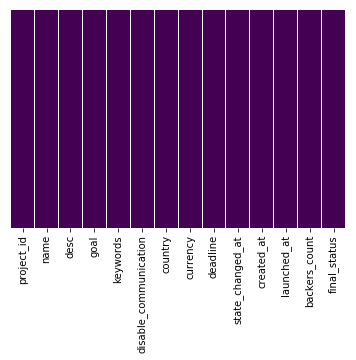

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Data Analysis**

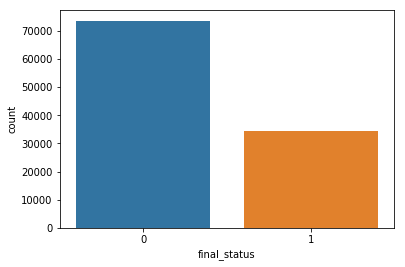

In [8]:
sns.countplot(data=train, x='final_status')

**Using 'disable_communication' for traning our data is not usefull because each traning example has False value for this field**

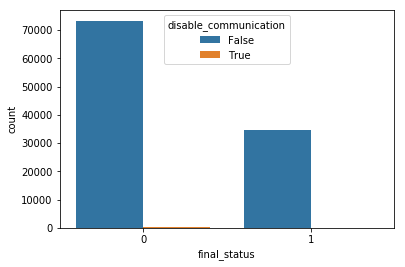

In [9]:
sns.countplot(data=train, x='final_status', hue='disable_communication')

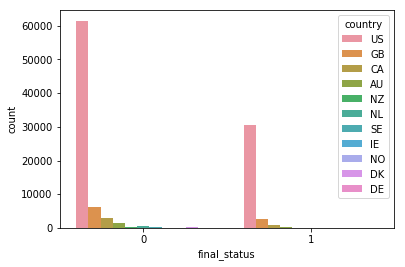

In [10]:
sns.countplot(data=train, x='final_status', hue='country')

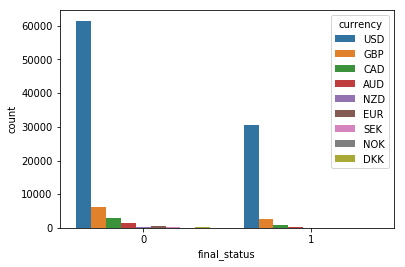

In [11]:
sns.countplot(data=train, x='final_status', hue='currency')

**Spliting Traning dataset into X_train and y_train**

In [12]:
X_train = train[['goal', 'deadline', 'state_changed_at', 'created_at', 'launched_at']]

In [13]:
y_train = train['final_status']

In [14]:
X_test = test[['goal', 'deadline', 'state_changed_at', 'created_at', 'launched_at']]

In [15]:
X_train = X_train.iloc[:, :].values
y_train = y_train.iloc[:].values
X_test = X_test.iloc[:, :].values

**Feature Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

**Traning Model**

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

C:\Users\Fahad Ali Khan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_test = log_model.predict(X_test)

In [20]:
submission = pd.DataFrame(test)

In [21]:
submission['final_status'] = pd.DataFrame(y_test)

In [22]:
submission

,project_id,name,desc,goal,keywords,disable_communication,country,currency,deadline,state_changed_at,created_at,launched_at,final_status
0,kkst917493670,Bràthair.,"My first film, of many to come. Trying to purs...",7000.0,brathair,False,US,USD,1449619185,1449619185,1446002581,1446159585,0
1,kkst1664901914,THE SCREENWRITER,A young man that has earned his master's in sc...,35000.0,the-screenwriter,False,US,USD,1453435620,1453435620,1450297323,1450411620,0
2,kkst925125077,The Hornets Nest the Fairmont Heights Story,Film about a high school constructed for negro...,49500.0,the-hornets-nest-the-fairmont-heights-story,False,US,USD,1451780700,1451780700,1448581356,1448672128,0
3,kkst1427645275,BROTHERS Season 2 - Groundbreaking Transgender...,The acclaimed series about a group of transgen...,40000.0,brothers-season-2-groundbreaking-transgender-male,False,US,USD,1445021518,1445021530,1440966830,1442429518,0
4,kkst1714249266,Blackdom the movie,Blackdom's history offers a new narrative tha...,20000.0,blackdom-the-movie,False,US,USD,1462068840,1462068844,1455765276,1458334890,0
5,kkst994744324,Hero's Battle: The Movie produced by Fish4Him ...,Sexual immorality is Satan's weapon to wage wa...,10000.0,heros-battle-the-movie,False,US,USD,1461777994,1461777994,1458171626,1459185994,0
6,kkst366471810,Limbo Film Project - 213 lives of Julia,Film focuses on connection between social alie...,1000.0,limbo-film-project-213-lives-of-julia,False,IT,EUR,1450087423,1450087423,1446994619,1447495423,0
7,kkst1686645245,Traffic (A Short Film),Paris is hired by a jazz singer to kill an old...,300.0,traffic-a-short-film,False,GB,GBP,1456516800,1456516801,1450964837,1451340184,0
8,kkst1009612119,Modern Gangsters,new web series created by jonney terry,6000.0,modern-gangsters,False,US,USD,1444337940,1444337941,1441745957,1441750564,0
9,kkst774947236,KISS ME GOODBYE - A REFRESHING VOICE IN INDIE ...,A martyr faces execution at the hands of the S...,8000.0,kiss-me-goodbye-a-new-voice-in-indie-filmmaking,False,US,USD,1444144222,1444144223,1438886415,1441120222,0


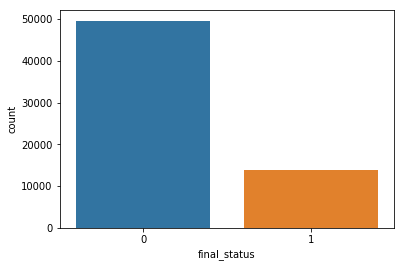

In [23]:
sns.countplot(data=submission, x='final_status')